In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')

C:\Users\nss_1\AppData\Local\Temp\ipykernel_26032\3495069841.py:1: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')


In [6]:
ordinal_vars = [
    col for col in df.columns
    if 3 <= df[col].dropna().nunique() <= 5
]

print("Ordinal variables (3 to 5 unique non-null values):")
print(ordinal_vars)

Ordinal variables (3 to 5 unique non-null values):
['COGCAT', 'COGCAT_TEXT', 'COGDXCL', 'COGSTATE', 'COHORT', 'DBSOFFTM', 'DXLVL', 'FEATAPATHY', 'FEATBWLDYS', 'FEATCLRLEV', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM', 'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN', 'FEATDYSPHG', 'FEATDYSTNA', 'FEATGZEPAL', 'FEATINSPST', 'FEATLMBAPX', 'FEATMCRGRA', 'FEATMTRFLC', 'FEATMYCLNS', 'FEATNEURSS', 'FEATNOLEVO', 'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 'FEATSEXDYS', 'FEATSHGAIT', 'FEATSTPPOS', 'FEATSUGRBD', 'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT', 'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3PTRML', 'NP3RTALL', 'NP3RTARL', 'NP3SPCH', 'NUPSOURC_prev', 'NUPSOURC_score2', 'OFFNORSN', 'ONNORSN', 'PTCGBOTH', 'STAIAD1', 'STAIAD10', 'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STA

In [ ]:
#Columns to try alone because they're missing value exceed 50%
#'DXLVL'(v02,v04,v05,v06,v08)
#FEATAPATHY V04,v05,v06,v08
#FEATBWLDYS
#FEATCLRLEV
#FEATGZEPAL	FEATINSPST	FEATLMBAPX	FEATMCRGRA	FEATMTRFLC
#FEATSHGAIT	FEATSTPPOS	FEATSUGRBD
#NP Scores could be imputed over all events

In [22]:
#required_visits = ["V04", "V06", "V08"]
required_visits = ["V04"]
ordinal_vars = ['COGCAT', 'COGDXCL', 'COGSTATE', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM', 
                'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN',
                'FEATDYSPHG', 'FEATDYSTNA', 'FEATMYCLNS',
                'FEATNEURSS', 'FEATNOLEVO', 'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 
                'FEATSEXDYS', 'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT', 
                'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 
                'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 
                'NP2TURN', 'NP2WALK', 'NP3PTRML', 'NP3RTALL', 'NP3RTARL', 'NP3SPCH', 'PTCGBOTH', 
                'STAIAD1', 'STAIAD10', 'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 
                'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD2', 'STAIAD20', 'STAIAD21', 
                'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27', 'STAIAD28', 
                'STAIAD29', 'STAIAD3', 'STAIAD30', 'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 
                'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD4', 'STAIAD40', 
                'STAIAD5', 'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9']


In [23]:
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]

In [16]:
df

,PATNO,AGE_AT_VISIT,FINAL_SEX_ENCODED,COHORT,COGCAT,COGDXCL,COGSTATE,COHORT,FEATCOGFLC,FEATCRTSNS,...,STAIAD38,STAIAD39,STAIAD4,STAIAD40,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9,EVENT_ID
3,3000,70.2,0.0,Healthy Control,NaN,NaN,NaN,Healthy Control,NaN,NaN,...,2.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,V04
12,3001,66.2,1.0,PD,NaN,NaN,NaN,PD,NaN,NaN,...,2.0,4.0,4.0,2.0,4.0,1.0,1.0,3.0,1.0,V04
20,3002,68.7,0.0,PD,NaN,NaN,NaN,PD,NaN,NaN,...,4.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,V04
28,3003,57.7,0.0,PD,NaN,NaN,NaN,PD,NaN,NaN,...,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,V04
36,3004,60.4,1.0,Healthy Control,NaN,NaN,NaN,Healthy Control,NaN,NaN,...,2.0,4.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,V04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422,293740,54.4,NaN,PD,NaN,1.0,1.0,PD,0.0,0.0,...,2.0,3.0,1.0,2.0,3.0,1.0,1.0,3.0,1.0,V04
12425,293759,48.2,NaN,PD,NaN,1.0,1.0,PD,0.0,0.0,...,1.0,3.0,1.0,1.0,3.0,1.0,2.0,3.0,1.0,V04
12429,293787,46.4,NaN,PD,NaN,NaN,NaN,PD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V04
12433,293798,72.5,NaN,PD,NaN,2.0,1.0,PD,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,V04


In [24]:
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]


In [6]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [7]:
df_control = df[df["COHORT"].isin(["Healthy Control"])]

In [1]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')
#required_visits = ["V04", "V06", "V08"]
required_visits = ["V08"]
ordinal_vars = ['COGCAT', 'COGDXCL', 'COGSTATE', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM', 
                'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN',
                'FEATDYSPHG', 'FEATDYSTNA', 'FEATMYCLNS',
                'FEATNEURSS', 'FEATNOLEVO', 'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 
                'FEATSEXDYS', 'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT', 
                'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 
                'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 
                'NP2TURN', 'NP2WALK', 'NP3PTRML', 'NP3RTALL', 'NP3RTARL', 'NP3SPCH', 'PTCGBOTH', 
                'STAIAD1', 'STAIAD10', 'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 
                'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD2', 'STAIAD20', 'STAIAD21', 
                'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27', 'STAIAD28', 
                'STAIAD29', 'STAIAD3', 'STAIAD30', 'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 
                'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD4', 'STAIAD40', 
                'STAIAD5', 'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9']
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]


C:\Users\nss_1\AppData\Local\Temp\ipykernel_25644\3778847406.py:20: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')


In [49]:
df_prod_pd

,PATNO,AGE_AT_VISIT,FINAL_SEX_ENCODED,COHORT,COGCAT,COGDXCL,COGSTATE,FEATCOGFLC,FEATCRTSNS,FEATDCRARM,...,STAIAD38,STAIAD39,STAIAD4,STAIAD40,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9,EVENT_ID
16,3001,68.3,1.0,PD,2.0,2.0,1.0,1.0,NaN,NaN,...,2.0,4.0,1.0,1.0,4.0,4.0,1.0,3.0,1.0,V08
31,3003,59.7,0.0,PD,2.0,2.0,1.0,0.0,NaN,NaN,...,1.0,3.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,V08
71,3010,50.2,1.0,PD,2.0,2.0,1.0,0.0,NaN,NaN,...,3.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,V08
85,3012,61.9,1.0,PD,2.0,2.0,2.0,1.0,NaN,NaN,...,2.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,V08
116,3018,63.6,0.0,PD,3.0,2.0,1.0,0.0,NaN,NaN,...,2.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,1.0,V08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,114526,62.9,NaN,PD,NaN,1.0,1.0,0.0,0.0,2.0,...,1.0,4.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,V08
10070,114613,60.4,NaN,Prodromal,NaN,1.0,1.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,4.0,1.0,2.0,4.0,1.0,V08
10075,114615,68.0,NaN,PD,NaN,1.0,1.0,0.0,0.0,1.0,...,1.0,4.0,1.0,1.0,4.0,1.0,2.0,4.0,1.0,V08
10151,116531,70.2,NaN,PD,NaN,2.0,1.0,2.0,0.0,1.0,...,1.0,4.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,V08


In [27]:
# Immediately check how many rows survived:
print("Number of PD/Prodromal subjects at V04:", df_pd.shape[0])
if df_pd.shape[0] == 0:
    raise ValueError(
        "After subsetting to EVENT_ID == 'V04' and COHORT in ['PD','Prodromal'], no rows remain.\n"
        "Please (a) confirm that 'V04' actually appears in your CSV's EVENT_ID column, and\n"
        "(b) confirm that some rows have COHORT == 'PD' or 'Prodromal' at visit V04."
    )

Number of PD/Prodromal subjects at V04: 0


ValueError: After subsetting to EVENT_ID == 'V04' and COHORT in ['PD','Prodromal'], no rows remain.
Please (a) confirm that 'V04' actually appears in your CSV's EVENT_ID column, and
(b) confirm that some rows have COHORT == 'PD' or 'Prodromal' at visit V04.

In [50]:
# Now—before casting to int—force each ordinal variable to numeric, coercing errors → NaN
for col in ordinal_vars:
    # This will convert unparseable entries (e.g. strings like "NA" or blank) to NaN
    df_pd[col] = pd.to_numeric(df_pd[col], errors="coerce")

In [51]:
df_pd

,PATNO,AGE_AT_VISIT,FINAL_SEX_ENCODED,COHORT,COGCAT,COGDXCL,COGSTATE,FEATCOGFLC,FEATCRTSNS,FEATDCRARM,...,STAIAD38,STAIAD39,STAIAD4,STAIAD40,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9,EVENT_ID
16,3001,68.3,1.0,PD,2.0,2.0,1.0,1.0,NaN,NaN,...,2.0,4.0,1.0,1.0,4.0,4.0,1.0,3.0,1.0,V08
31,3003,59.7,0.0,PD,2.0,2.0,1.0,0.0,NaN,NaN,...,1.0,3.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,V08
71,3010,50.2,1.0,PD,2.0,2.0,1.0,0.0,NaN,NaN,...,3.0,3.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,V08
85,3012,61.9,1.0,PD,2.0,2.0,2.0,1.0,NaN,NaN,...,2.0,3.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,V08
116,3018,63.6,0.0,PD,3.0,2.0,1.0,0.0,NaN,NaN,...,2.0,3.0,1.0,2.0,4.0,1.0,4.0,3.0,1.0,V08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10061,114526,62.9,NaN,PD,NaN,1.0,1.0,0.0,0.0,2.0,...,1.0,4.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,V08
10070,114613,60.4,NaN,Prodromal,NaN,1.0,1.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,4.0,1.0,2.0,4.0,1.0,V08
10075,114615,68.0,NaN,PD,NaN,1.0,1.0,0.0,0.0,1.0,...,1.0,4.0,1.0,1.0,4.0,1.0,2.0,4.0,1.0,V08
10151,116531,70.2,NaN,PD,NaN,2.0,1.0,2.0,0.0,1.0,...,1.0,4.0,2.0,1.0,3.0,1.0,1.0,3.0,1.0,V08


In [37]:
df_pd.dropna(subset=ordinal_vars, inplace=True)

In [13]:
data_mat

array([[2, 1, 1, ..., 1, 3, 1],
       [2, 1, 0, ..., 1, 4, 1],
       [2, 1, 0, ..., 2, 1, 1],
       ...,
       [1, 1, 0, ..., 2, 4, 1],
       [2, 1, 2, ..., 1, 3, 1],
       [1, 1, 0, ..., 1, 3, 3]])

In [14]:
print("Overall maximum observed score:", data_mat.max())
print("Per‐biomarker maxima:", data_mat.max(axis=0))


Overall maximum observed score: 4
Per‐biomarker maxima: [3 3 2 2 2 2 2 2 2 2 1 2 3 2 4 4 4 4 4 3 3 3 4 4 3 4 4 3 3 4 4 4 3 3 3 4 3
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4]


In [4]:
import numpy as np

def build_score_matrix(data_mat: np.ndarray) -> np.ndarray:
    """
    Parameters
    ----------
    data_mat : np.ndarray  (shape = n_samples x n_biomarkers)
        Raw dataset in which each column is a biomarker and each row is a sample.
        Values are assumed to be non-negative integers (0 means “no score” or “missing”).

    Returns
    -------
    score_vals : np.ndarray  (shape = n_biomarkers x (max_score_overall+1))
        Row i contains [0, 1, …, max_i] where max_i is the maximum value
        seen in biomarker i.  Any cells beyond max_i are left as 0 padding.
    """
    # number of biomarkers is the number of columns
    n_biomarkers = data_mat.shape[1]

    # overall width = global maximum + 1 (so the range 0..max fits)
    max_score_overall = int(data_mat.max()) + 1

    score_vals = np.zeros((n_biomarkers, max_score_overall), dtype=int)

    for b in range(n_biomarkers):
        max_b = int(data_mat[:, b].max())
        # fill 0..max_b inclusive
        score_vals[b, :max_b + 1] = np.arange(0, max_b + 1)

    return score_vals
Z_scores=build_score_matrix(data_mat)

In [5]:
Z_scores

array([[0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2,

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'COGCAT', 'COGDXCL', 'COGSTATE', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM',
    'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN',
    'FEATDYSPHG', 'FEATDYSTNA', 'FEATMYCLNS', 'FEATNEURSS', 'FEATNOLEVO',
    'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 'FEATSEXDYS',
    'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT',
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT',
    'NP2FREZ', 'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV',
    'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3PTRML',
    'NP3RTALL', 'NP3RTARL', 'NP3SPCH', 'PTCGBOTH', 'STAIAD1', 'STAIAD10',
    'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 'STAIAD16',
    'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD2', 'STAIAD20', 'STAIAD21',
    'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27',
    'STAIAD28', 'STAIAD29', 'STAIAD3', 'STAIAD30', 'STAIAD31', 'STAIAD32',
    'STAIAD33', 'STAIAD34', 'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38',
    'STAIAD39', 'STAIAD4', 'STAIAD40', 'STAIAD5', 'STAIAD6', 'STAIAD7',
    'STAIAD8', 'STAIAD9'
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    """
    Computes a padded matrix of score values for each biomarker.

    Parameters:
    -----------
    data_mat_healthy : np.ndarray
        Matrix of shape (n_healthy_subjects, n_biomarkers).
    
    data_mat_pd : np.ndarray
        Matrix of shape (n_pd_subjects, n_biomarkers).

    Returns:
    --------
    score_vals : np.ndarray
        2D array of shape (n_biomarkers, max_num_scores), where each row contains
        valid score values for that biomarker, padded with zeros if needed.
    """
    # Combine the datasets
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    # Get maximum number of scores across all biomarkers
    max_scores_per_biomarker = [int(combined_data[:, b].max()) + 1 for b in range(n_biomarkers)]
    max_num_scores = max(max_scores_per_biomarker)

    # Initialize score_vals matrix with zeros
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)

    # Fill each row with valid scores
    for b in range(n_biomarkers):
        valid_scores = np.arange(0, max_scores_per_biomarker[b])
        score_vals[b, :len(valid_scores)] = valid_scores

    return score_vals
score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)
# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Compute score means and stds correctly
unique_scores = sorted(set(np.unique(score_vals)))
score_means = []
score_stds = []
for score in unique_scores:
    means, stds = [], []
    for biomarker in ordinal_vars:
        vals = df_pd[biomarker]
        subset = vals[vals == score]
        if len(subset) >= 2:
            m, s = subset.mean(), subset.std()
        elif len(subset) == 1:
            m = subset.iloc[0]
            s = vals[vals != score].std()
        else:
            m, s = np.nan, np.nan
        means.append(m)
        stds.append(s)
    score_means.append(np.array(means))
    score_stds.append(np.array(stds))

# 13) Build prob_score
N_scores = len(score_means)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinal_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()

# 17) Plot results
figs, axs = model.plot_sustain_model(
    samples_sequence=model.samples_sequence,
    samples_f=model.samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    ml_f_EM=model.ml_f,
    separate_subtypes=False
)

for i, fig in enumerate(figs):
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, f"sustain_plot_{i}.png"))
    plt.show()


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 77
NaNs in prob_nl: 0


NameError: name 'prob_score' is not defined

In [2]:
import time, ipdb

ModuleNotFoundError: No module named 'ipdb'

In [8]:
!conda install -y -c conda-forge ipdb

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 25.5.1

Please update conda by running

    $ conda update -n base conda




In [4]:
!which python
!pip show ipdb

'which' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


Name: ipdb
Version: 0.13.13
Summary: IPython-enabled pdb
Home-page: https://github.com/gotcha/ipdb
Author: Godefroid Chapelle
Author-email: gotcha@bubblenet.be
License: BSD
Location: c:\users\nss_1\anaconda3\envs\sustain_tutorial_env\lib\site-packages
Requires: decorator, ipython, tomli
Required-by: 


In [5]:
!where python

C:\Users\nss_1\anaconda3\envs\sustain_tutorial_env\python.exe
C:\Users\nss_1\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\nss_1\AppData\Local\Programs\Python\Python38-32\python.exe
C:\Users\nss_1\AppData\Local\Microsoft\WindowsApps\python.exe
C:\Users\nss_1\anaconda3\python.exe


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'COGCAT', 'COGDXCL', 'COGSTATE', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM',
    'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN',
    'FEATDYSPHG', 'FEATDYSTNA', 'FEATMYCLNS', 'FEATNEURSS', 'FEATNOLEVO',
    'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 'FEATSEXDYS',
    'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT',
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT',
    'NP2FREZ', 'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV',
    'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3PTRML',
    'NP3RTALL', 'NP3RTARL', 'NP3SPCH', 'PTCGBOTH', 'STAIAD1', 'STAIAD10',
    'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 'STAIAD16',
    'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD2', 'STAIAD20', 'STAIAD21',
    'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27',
    'STAIAD28', 'STAIAD29', 'STAIAD3', 'STAIAD30', 'STAIAD31', 'STAIAD32',
    'STAIAD33', 'STAIAD34', 'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38',
    'STAIAD39', 'STAIAD4', 'STAIAD40', 'STAIAD5', 'STAIAD6', 'STAIAD7',
    'STAIAD8', 'STAIAD9'
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]
    max_scores_per_biomarker = [int(combined_data[:, b].max()) + 1 for b in range(n_biomarkers)]
    max_num_scores = max(max_scores_per_biomarker)
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)
    for b in range(n_biomarkers):
        valid_scores = np.arange(0, max_scores_per_biomarker[b])
        score_vals[b, :len(valid_scores)] = valid_scores
    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix
score_vals_flat = sorted(set(np.unique(score_vals)))
N_scores = len(score_vals_flat)
p_score_dist = np.zeros((N_scores, N_scores + 1))  # rows = true scores (1 to N), cols = observed (0 to N)
for z in range(1, N_scores + 1):  # true score from 1 to N_scores
    for s in range(N_scores + 1):  # observed score from 0 to N_scores
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= np.sum(p_score_dist[z - 1])  # normalize

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    N_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, N_scores))
    for z in range(N_scores):
        for s in range(N_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinal_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()

# 17) Plot results
figs, axs = model.plot_sustain_model(
    samples_sequence=model.samples_sequence,
    samples_f=model.samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    ml_f_EM=model.ml_f,
    separate_subtypes=False
)

for i, fig in enumerate(figs):
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, f"sustain_plot_{i}.png"))
    plt.show()


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 77
NaNs in prob_nl: 0
NaNs in prob_score: 0
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem


KeyboardInterrupt: 

In [ ]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# ────────────────────────────────────────────────
# 1. Load dataset
csv_path = Path(r"C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv")
df = pd.read_csv(csv_path, sep=";", low_memory=False)

# ────────────────────────────────────────────────
# 2. Compute STAI and GDS scores
state_items = [f"STAIDAD{i}" for i in range(1, 21)]
trait_items = [f"STAIDAD{i}" for i in range(21, 41)]
reverse_stai = {
    "STAIDAD1", "STAIDAD2", "STAIDAD5", "STAIDAD8", "STAIDAD10", "STAIDAD11",
    "STAIDAD15", "STAIDAD16", "STAIDAD19", "STAIDAD20", "STAIDAD21", "STAIDAD23",
    "STAIDAD26", "STAIDAD27", "STAIDAD30", "STAIDAD33", "STAIDAD34", "STAIDAD36",
    "STAIDAD39", "STAIDAD40"
}

# Only reverse score items that exist in the dataframe
available_items = set(df.columns) & reverse_stai
for col in available_items:
    df[col] = 5 - df[col]

# Calculate scores only for items that exist
existing_state_items = [item for item in state_items if item in df.columns]
existing_trait_items = [item for item in trait_items if item in df.columns]

if existing_state_items:
    df["STAI_State_Anxiety"] = df[existing_state_items].sum(axis=1)
if existing_trait_items:
    df["STAI_Trait_Anxiety"] = df[existing_trait_items].sum(axis=1)

gds_items = [
    "GDSAFRAD", "GDSALIVE", "GDSBETER", "GDSBORED", "GDSDROPD", "GDSEMPTY",
    "GDSENRGY", "GDSGSPIR", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSHOPLS",
    "GDSMEMRY", "GDSSATIS", "GDSWRTLS"
]
gds_reverse = {"GDSAFRAD", "GDSHAPPY", "GDSSATIS"}

# Only reverse score items that exist in the dataframe
available_gds_items = set(df.columns) & gds_reverse
for col in available_gds_items:
    df[col] = 1 - df[col]

existing_gds_items = [item for item in gds_items if item in df.columns]
if existing_gds_items:
    df["GDS_Total_Score"] = df[existing_gds_items].sum(axis=1)

# ────────────────────────────────────────────────
# 3. Keep only visit V08 and essential columns
initial_ordinal = [
    "MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT",
    "AGE_AT_VISIT",
    "STAI_State_Anxiety", "STAI_Trait_Anxiety",
    "GDS_Total_Score", "MSEADLG"
]
meta_cols = ["PATNO", "FINAL_SEX_ENCODED", "COHORT", "EVENT_ID"]

# Only keep columns that exist in the dataframe
existing_ordinal = [col for col in initial_ordinal if col in df.columns]
df = df[df["EVENT_ID"] == "V08"].loc[:, meta_cols + existing_ordinal]

# Optional: treat age as ordinal (nearest year)
if "AGE_AT_VISIT" in df.columns:
    df["AGE_AT_VISIT"] = df["AGE_AT_VISIT"].round().astype(int)

# ────────────────────────────────────────────────
# 4. Split cohorts
df_healthy = df[df["COHORT"] == "Healthy Control"].copy()
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls = {df_healthy.shape[0]} | PD/Prodromal = {df_pd.shape[0]}")

# ────────────────────────────────────────────────
# 5. Drop high-missing columns (≥20 %)
null_fraction = df_pd[existing_ordinal].isna().mean()
drop_cols = null_fraction[null_fraction > 0.20].index.tolist()
df_pd.drop(columns=drop_cols, inplace=True)
df_healthy.drop(columns=drop_cols, inplace=True, errors="ignore")

# ────────────────────────────────────────────────
# 6. Drop zero/near-zero-variance biomarkers
remaining_cols = [col for col in existing_ordinal if col not in drop_cols]
low_var = [v for v in remaining_cols if df_pd[v].nunique(dropna=True) <= 1]
df_pd.drop(columns=low_var, inplace=True)
df_healthy.drop(columns=low_var, inplace=True, errors="ignore")

# ────────────────────────────────────────────────
# 7. Final list of ordinal biomarkers (after all cleaning)
ordinal_vars = [
    c for c in df_pd.columns
    if c not in meta_cols            # remove meta
    and c not in drop_cols
    and c not in low_var
]
print("Final ordinal variables:", ordinal_vars)

# ────────────────────────────────────────────────
# 8. Drop rows with missing values in remaining biomarkers
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# ────────────────────────────────────────────────
# 9. Build data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values

n_samples, n_biomarkers = data_mat_pd.shape
assert len(ordinal_vars) == n_biomarkers, "Column mismatch after cleaning"

# ────────────────────────────────────────────────
# 10. Create score_vals (padded)
def get_score_vals_padded(mat_h, mat_pd):
    combined = np.vstack([mat_h, mat_pd])
    max_scores = (combined.max(axis=0) + 1).astype(int)
    max_len = max(max_scores)
    score_vals = np.zeros((combined.shape[1], max_len), dtype=int)
    for i, m in enumerate(max_scores):
        score_vals[i, :m] = np.arange(m)
    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

# ────────────────────────────────────────────────
# 11. prob_nl (P(normal | value))
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    mu, sigma = data_mat_healthy[:, j].mean(), data_mat_healthy[:, j].std()
    # Add small epsilon to prevent divide-by-zero
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=max(sigma, 0.1)) + 1e-10

# ────────────────────────────────────────────────
# 12. prob_score (P(score | latent-z)) - Corrected implementation
# Get the maximum score for each biomarker
max_scores_per_biomarker = [int(np.max(data_mat_pd[:, i])) + 1 for i in range(n_biomarkers)]
max_score = max(max_scores_per_biomarker)

# Initialize prob_score with correct dimensions (n_samples × n_biomarkers × max_score)
prob_score = np.zeros((n_samples, n_biomarkers, max_score))

for j in range(n_biomarkers):
    # Get healthy control statistics for this biomarker
    mu, sigma = data_mat_healthy[:, j].mean(), data_mat_healthy[:, j].std()
    sigma = max(sigma, 0.1)  # Prevent division by zero
    
    # Create probability distribution for each possible score
    for s in range(max_score):
        # Probability of score s given normal distribution
        prob_score[:, j, s] = norm.pdf(s, loc=mu, scale=sigma)
    
    # Normalize so probabilities sum to 1 for each sample
    prob_score[:, j, :] = prob_score[:, j, :] / (prob_score[:, j, :].sum(axis=1, keepdims=True) + 1e-10)

# Data validation checks
print("\nData validation:")
print(f"Number of samples: {n_samples}")
print(f"Number of biomarkers: {n_biomarkers}")
print(f"Max score across biomarkers: {max_score}")
print(f"prob_nl shape: {prob_nl.shape}")
print(f"prob_score shape: {prob_score.shape}")
print(f"score_vals shape: {score_vals.shape}")

# ────────────────────────────────────────────────
# 13. Run Ordinal SuStaIn
output_folder = "./ordinal_output_newvars"
os.makedirs(output_folder, exist_ok=True)

try:
    model = OrdinalSustain(
        prob_nl=prob_nl,
        prob_score=prob_score,
        score_vals=score_vals,
        biomarker_labels=ordinal_vars,
        N_startpoints=25,
        N_S_max=2,
        N_iterations_MCMC=10_000,
        output_folder=output_folder,
        dataset_name="PD_ordinal_V08_newvars",
        use_parallel_startpoints=False,
        seed=42,
    )
    model.run_sustain_algorithm()
except Exception as e:
    print(f"Error running SuStaIn: {str(e)}")
    raise

# ────────────────────────────────────────────────
# 14. Plot & save
try:
    figs, _ = model.plot_sustain_model(
        samples_sequence=model.samples_sequence,
        samples_f=model.samples_f,
        n_samples=n_samples,
        score_vals=score_vals,
        biomarker_labels=ordinal_vars,
        ml_f_EM=model.ml_f,
        separate_subtypes=False,
    )

    for i, fig in enumerate(figs):
        fig.tight_layout()
        fig.savefig(os.path.join(output_folder, f"sustain_plot_{i}.png"))
        plt.show()
except Exception as e:
    print(f"Error plotting results: {str(e)}")

# Optional: Plot biomarker distributions
plt.figure(figsize=(12, 6))
for i in range(min(3, n_biomarkers)):
    plt.subplot(1, 3, i+1)
    plt.hist(data_mat_pd[:, i], bins=20, alpha=0.5, label='PD')
    plt.hist(data_mat_healthy[:, i], bins=20, alpha=0.5, label='Healthy')
    plt.title(ordinal_vars[i])
    plt.legend()
plt.tight_layout()
plt.show()

Healthy controls = 181 | PD/Prodromal = 1086
Final ordinal variables: ['MCATOT', 'NP1RTOT', 'NP2PTOT', 'NP3TOT', 'AGE_AT_VISIT', 'GDS_Total_Score', 'MSEADLG']

Data validation:
Number of samples: 930
Number of biomarkers: 7
Max score across biomarkers: 101
prob_nl shape: (930, 7)
prob_score shape: (930, 7, 101)
score_vals shape: (7, 101)
Failed to find pickle file: ./ordinal_output_newvars\pickle_files\PD_ordinal_V08_newvars_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem


In [16]:
print("prob_nl shape :", prob_nl.shape)        # should be (n_subjects, n_biomarkers)
print("prob_score   :", prob_score.shape)      # should be (n_subjects, n_biomarkers, N_scores)
print("#labels      :", len(ordinal_vars))

prob_nl shape : (930, 10)
prob_score   : (930, 10, 101)
#labels      : 9


In [17]:
print("Final ordinal_vars:", ordinal_vars)
print("data_mat_pd shape:", data_mat_pd.shape)

Final ordinal_vars: ['MCATOT', 'NP1RTOT', 'NP2PTOT', 'NP3TOT', 'AGE_AT_VISIT', 'STAI_State_Anxiety', 'STAI_Trait_Anxiety', 'GDS_Total_Score', 'MSEADLG']
data_mat_pd shape: (930, 10)


In [14]:
# Remove any non-ordinal fields
non_ordinal = ["PATNO", "FINAL_SEX_ENCODED", "COHORT", "EVENT_ID"]
ordinal_vars = [col for col in df_pd.columns if col not in non_ordinal]
print("Corrected ordinal_vars:", ordinal_vars)

Corrected ordinal_vars: ['AGE_AT_VISIT', 'MCATOT', 'NP1RTOT', 'NP2PTOT', 'NP3TOT', 'AGE_AT_VISIT', 'STAI_State_Anxiety', 'STAI_Trait_Anxiety', 'GDS_Total_Score', 'MSEADLG']


In [12]:
# === DEBUG PRINT BLOCK ===
print("\n--- DEBUG PROBABILITY VALUES ---")

# Print sample values of prob_nl
print("Sample prob_nl values:")
for i in range(3):  # first 3 subjects
    for j in range(3):  # first 3 biomarkers
        print(f"prob_nl[{i},{j}] = {prob_nl[i, j]:.4e}")

# Print sample values of prob_score
print("\nSample prob_score values (first 3 score levels):")
for i in range(3):  # first 3 subjects
    for j in range(3):  # first 3 biomarkers
        values = [f"{prob_score[i, j, s]:.4e}" for s in range(min(3, prob_score.shape[2]))]
        print(f"prob_score[{i},{j},0:{len(values)}] = {values}")

# Count total zeros in prob_nl and prob_score
print(f"\nTotal zero values in prob_nl: {(prob_nl == 0).sum()}")
print(f"Total zero values in prob_score: {(prob_score == 0).sum()}")


--- DEBUG PROBABILITY VALUES ---
Sample prob_nl values:
prob_nl[0,0] = 1.1532e-03
prob_nl[0,1] = 3.1411e+00
prob_nl[0,2] = 7.6946e-22
prob_nl[1,0] = 1.1532e-03
prob_nl[1,1] = 3.1411e+00
prob_nl[1,2] = 3.9894e+00
prob_nl[2,0] = 1.1532e-03
prob_nl[2,1] = 3.1411e+00
prob_nl[2,2] = 3.9894e+00

Sample prob_score values (first 3 score levels):
prob_score[0,0,0:3] = ['2.5702e-01', '4.0083e-01', '2.4311e-01']
prob_score[0,1,0:3] = ['4.2376e-01', '2.4311e-01', '5.4246e-02']
prob_score[0,2,0:3] = ['4.2376e-01', '2.4311e-01', '5.4246e-02']
prob_score[1,0,0:3] = ['2.5702e-01', '4.0083e-01', '2.4311e-01']
prob_score[1,1,0:3] = ['4.2376e-01', '2.4311e-01', '5.4246e-02']
prob_score[1,2,0:3] = ['2.5702e-01', '5.4246e-02', '4.4528e-03']
prob_score[2,0,0:3] = ['2.5702e-01', '4.0083e-01', '2.4311e-01']
prob_score[2,1,0:3] = ['4.2376e-01', '2.4311e-01', '5.4246e-02']
prob_score[2,2,0:3] = ['2.5702e-01', '5.4246e-02', '4.4528e-03']

Total zero values in prob_nl: 1
Total zero values in prob_score: 0


In [ ]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'COGCAT', 'COGDXCL', 'COGSTATE', 'FEATCOGFLC', 'FEATCRTSNS', 'FEATDCRARM', 
                'FEATDELHAL', 'FEATDEPRES', 'FEATDIMOLF', 'FEATDYSART', 'FEATDYSKIN',
                'FEATDYSPHG', 'FEATDYSTNA', 'FEATMYCLNS',
                'FEATNEURSS', 'FEATNOLEVO', 'FEATPOSHYP', 'FEATPST3YR', 'FEATPYRTCT', 'FEATSBDERM', 
                'FEATSEXDYS', 'FEATURNDYS', 'FEATWDGAIT', 'MCAABSTR', 'MCASER7', 'MCASNTNC', 'MRIRSLT', 
                'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 
                'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL', 'NP2TRMR', 
                'NP2TURN', 'NP2WALK','PTCGBOTH', 
                'STAIAD1', 'STAIAD10', 'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 
                'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD2', 'STAIAD20', 'STAIAD21', 
                'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27', 'STAIAD28', 
                'STAIAD29', 'STAIAD3', 'STAIAD30', 'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 
                'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD4', 'STAIAD40', 
                'STAIAD5', 'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9'
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]
    max_scores_per_biomarker = [int(combined_data[:, b].max()) + 1 for b in range(n_biomarkers)]
    max_num_scores = max(max_scores_per_biomarker)
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)
    for b in range(n_biomarkers):
        valid_scores = np.arange(0, max_scores_per_biomarker[b])
        score_vals[b, :len(valid_scores)] = valid_scores
    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix
score_vals_flat = sorted(set(np.unique(score_vals)))
N_scores = len(score_vals_flat)
p_score_dist = np.zeros((N_scores, N_scores + 1))  # rows = true scores (1 to N), cols = observed (0 to N)
for z in range(1, N_scores + 1):  # true score from 1 to N_scores
    for s in range(N_scores + 1):  # observed score from 0 to N_scores
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= np.sum(p_score_dist[z - 1])  # normalize

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    N_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, N_scores))
    for z in range(N_scores):
        for s in range(N_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinal_V08_all",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()

# 17) Plot results
figs, axs = model.plot_sustain_model(
    samples_sequence=model.samples_sequence,
    samples_f=model.samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    ml_f_EM=model.ml_f,
    separate_subtypes=False
)

for i, fig in enumerate(figs):
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, f"sustain_plot_{i}.png"))
    plt.show()
    


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 73
NaNs in prob_nl: 0
NaNs in prob_score: 0
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_all_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem


In [104]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DPRS', 'NP1HALL'
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    # Find max actual score per biomarker (excluding 0 if it's a valid score)
    max_scores_per_biomarker = []
    for b in range(n_biomarkers):
        unique_scores = np.unique(combined_data[:, b])
        if 0 in unique_scores:
            valid_scores = unique_scores[unique_scores > 0]
        else:
            valid_scores = unique_scores
        max_scores_per_biomarker.append(len(valid_scores))

    max_num_scores = max(max_scores_per_biomarker)

    # Build score_vals with padding at the end
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)
    for b in range(n_biomarkers):
        score_vals[b, :max_scores_per_biomarker[b]] = np.arange(1, max_scores_per_biomarker[b] + 1)

    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix
score_vals_flat = sorted(set(np.unique(score_vals)))
N_scores = len(score_vals_flat)
p_score_dist = np.zeros((N_scores, N_scores + 1))  # rows = true scores (1 to N), cols = observed (0 to N)
for z in range(1, N_scores + 1):  # true score from 1 to N_scores
    for s in range(N_scores + 1):  # observed score from 0 to N_scores
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= np.sum(p_score_dist[z - 1])  # normalize

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    N_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, N_scores))
    for z in range(N_scores):
        for s in range(N_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinal_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()

# 17) Plot results
figs, axs = model.plot_sustain_model(
    samples_sequence=model.samples_sequence,
    samples_f=model.samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    ml_f_EM=model.ml_f,
    separate_subtypes=False
)

for i, fig in enumerate(figs):
    fig.tight_layout()
    fig.savefig(os.path.join(output_folder, f"sustain_plot_{i}.png"))
    plt.show()
    


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 5
NaNs in prob_nl: 0
NaNs in prob_score: 0
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -3535.053621690686


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-3353.98799801]
Overall ML likelihood is [-3353.98799801]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

AttributeError: 'OrdinalSustain' object has no attribute 'plot_sustain_model'

In [105]:
(samples_sequence, samples_f, ml_subtype, prob_ml_subtype,
 ml_stage, prob_ml_stage, prob_subtype_stage) = model.run_sustain_algorithm()

Found pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: ./ordinal_output\pickle_files\PD_ordinal_V08_subtype1.pickle. Using pickled variables for 1 subtype.


In [107]:
Z_scores

NameError: name 'Z_scores' is not defined

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'NP2DRES', 'NP2EAT',
    'NP2FREZ', 'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV',
    'NP2SPCH', 'NP2SWAL', 'NP2TRMR',
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    max_scores_per_biomarker = []
    for b in range(n_biomarkers):
        unique_scores = np.unique(combined_data[:, b])
        valid_scores = unique_scores[unique_scores > 0] if 0 in unique_scores else unique_scores
        max_scores_per_biomarker.append(len(valid_scores))

    max_num_scores = max(max_scores_per_biomarker)

    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)
    for b in range(n_biomarkers):
        score_vals[b, :max_scores_per_biomarker[b]] = np.arange(1, max_scores_per_biomarker[b] + 1)

    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix
score_vals_flat = np.unique(score_vals[score_vals > 0])  # exclude 0
N_scores = len(score_vals_flat)
p_score_dist = np.zeros((N_scores, N_scores + 1))  # rows = true scores (1 to N), cols = observed (0 to N)
for z in range(1, N_scores + 1):
    for s in range(N_scores + 1):
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= p_score_dist[z - 1].sum()  # normalize

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    N_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, N_scores))
    for z in range(N_scores):
        for s in range(N_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinalNP2_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()



Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 11
NaNs in prob_nl: 0
NaNs in prob_score: 0
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -5505.318520045906


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-4612.01580333]
Overall ML likelihood is [-4612.01580333]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

(array([[[ 6.,  6.,  6., ...,  6.,  6.,  6.],
         [10., 10., 10., ..., 10., 10., 10.],
         [ 4.,  4.,  4., ...,  4.,  4.,  4.],
         ...,
         [41., 41., 41., ..., 34., 34., 34.],
         [34., 34., 34., ..., 31., 31., 31.],
         [31., 31., 31., ..., 38., 38., 38.]],
 
        [[10., 10., 10., ..., 10., 10., 10.],
         [ 7.,  7.,  7., ...,  7.,  7.,  7.],
         [ 4.,  4.,  4., ...,  4.,  4.,  4.],
         ...,
         [21., 21., 21., ..., 41., 41., 31.],
         [32., 32., 32., ..., 42., 42., 42.],
         [42., 42., 42., ..., 39., 39., 39.]]]),
 array([[0.50989119, 0.50990287, 0.50990287, ..., 0.51008462, 0.51007496,
         0.51008295],
        [0.49010881, 0.49009713, 0.49009713, ..., 0.48991538, 0.48992504,
         0.48991705]]),
 array([[0.],
        [1.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]]),
 array([[0.994761  ],
        [0.99999093],
        [0.87489616],
        ...,
        [0.95742628],
        [0.99011417]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


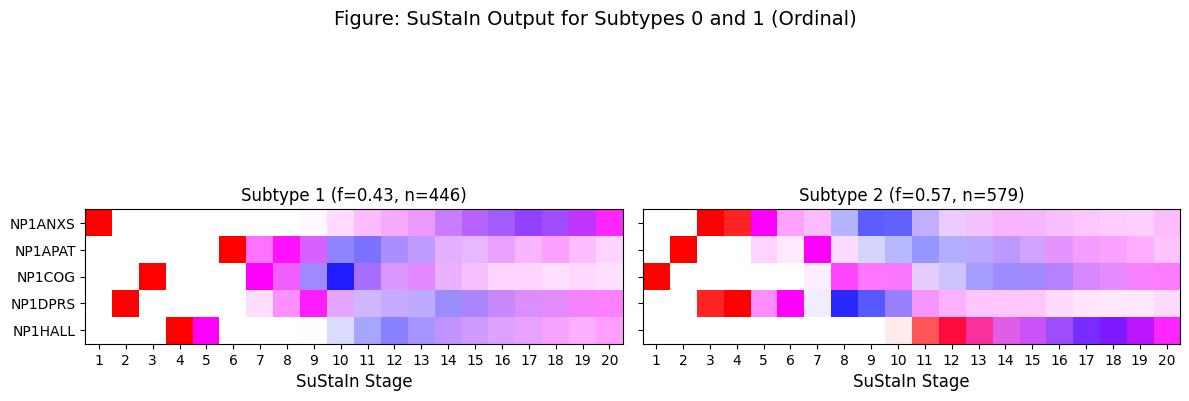

In [106]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import OrdinalSustain

# Define number of scores per biomarker
num_scores = 4

# Extract biomarker labels from your DataFrame
biomarker_labels = df_pd[ordinal_vars].columns

# Create correct subtype order as a list (NOT tuple)
subtype_order = list(range(samples_sequence.shape[0]))  # e.g. [0, 1]

# Plot combined positional variance
figs, axs = OrdinalSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    subtype_order=subtype_order,
    biomarker_labels=biomarker_labels,
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(12, 5)
)

plt.suptitle("Figure: SuStaIn Output for Subtypes 0 and 1 (Ordinal)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [151]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
    'NP2DRES', 'NP2EAT',
    'NP2FREZ', 'NP2HOBB', 'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV',
    'NP2SPCH', 'NP2SWAL', 'NP2TRMR',
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix with padding using the next number (not zero)
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    max_scores_per_biomarker = []
    unique_scores_per_biomarker = []

    for b in range(n_biomarkers):
        unique_scores = np.unique(combined_data[:, b])
        valid_scores = unique_scores[unique_scores > 0] if 0 in unique_scores else unique_scores
        unique_scores_per_biomarker.append(valid_scores)
        max_scores_per_biomarker.append(len(valid_scores))

    max_num_scores = max(max_scores_per_biomarker)

    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)

    for b in range(n_biomarkers):
        valid_scores = unique_scores_per_biomarker[b]
        k = len(valid_scores)
        score_vals[b, :k] = valid_scores
        if k < max_num_scores:
            # Pad with next consecutive numbers
            last_val = valid_scores[-1]
            score_vals[b, k:] = np.arange(last_val + 1, last_val + 1 + (max_num_scores - k))

    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)

Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 11


In [152]:
# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix
score_vals_flat = np.unique(score_vals[score_vals > 0])  # exclude 0
N_scores = len(score_vals_flat)
p_score_dist = np.zeros((N_scores, N_scores + 1))  # rows = true scores (1 to N), cols = observed (0 to N)
for z in range(1, N_scores + 1):
    for s in range(N_scores + 1):
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= p_score_dist[z - 1].sum()  # normalize

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    N_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, N_scores))
    for z in range(N_scores):
        for s in range(N_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinalNP2_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()



NaNs in prob_nl: 0
NaNs in prob_score: 0
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -5528.041393768359


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-4633.51349445]
Overall ML likelihood is [-4633.51349445]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

(array([[[ 7.,  7.,  7., ...,  7.,  7.,  7.],
         [ 4.,  4.,  4., ...,  4.,  4.,  4.],
         [10., 10., 10., ..., 10., 10., 10.],
         ...,
         [42., 42., 42., ..., 43., 43., 43.],
         [32., 32., 32., ..., 42., 42., 42.],
         [43., 43., 43., ..., 35., 35., 35.]],
 
        [[10., 10., 10., ..., 10., 10., 10.],
         [ 6.,  6.,  6., ...,  6.,  6.,  6.],
         [ 4.,  4.,  4., ...,  4.,  4.,  4.],
         ...,
         [40., 40., 40., ..., 42., 42., 42.],
         [32., 32., 32., ..., 39., 39., 39.],
         [43., 43., 43., ..., 38., 38., 38.]]]),
 array([[0.40757248, 0.40384141, 0.40384141, ..., 0.43068647, 0.43280721,
         0.43100781],
        [0.59242752, 0.59615859, 0.59615859, ..., 0.56931353, 0.56719279,
         0.56899219]]),
 array([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]]),
 array([[0.9976462 ],
        [0.99830457],
        [0.64900198],
        ...,
        [0.71211113],
        [0.64031666]

In [153]:
(samples_sequence, samples_f, ml_subtype, prob_ml_subtype,
 ml_stage, prob_ml_stage, prob_subtype_stage) = model.run_sustain_algorithm()

Found pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: ./ordinal_output\pickle_files\PD_ordinalNP2_V08_subtype1.pickle. Using pickled variables for 1 subtype.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


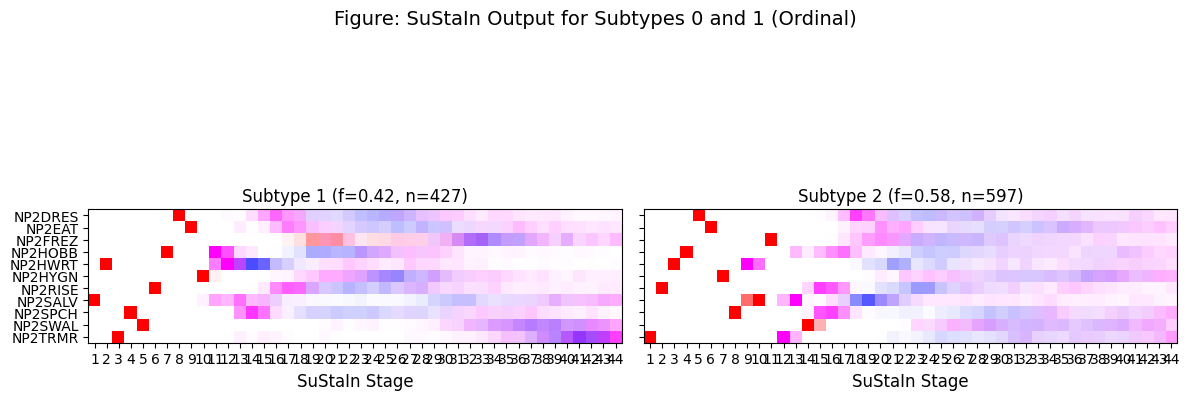

In [154]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import OrdinalSustain

# Define number of scores per biomarker
num_scores = 4

# Extract biomarker labels from your DataFrame
biomarker_labels = df_pd[ordinal_vars].columns

# Create correct subtype order as a list (NOT tuple)
subtype_order = list(range(samples_sequence.shape[0]))  # e.g. [0, 1]

# Plot combined positional variance
figs, axs = OrdinalSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    subtype_order=subtype_order,
    biomarker_labels=biomarker_labels,
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(12, 5)
)

plt.suptitle("Figure: SuStaIn Output for Subtypes 0 and 1 (Ordinal)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [2]:
print("score_vals shape:   ", score_vals.shape)              # (n_biomarkers, max_num_scores)
print("prob_score shape:   ", prob_score.shape)              # (n_samples, n_biomarkers, max_num_scores)
print("Flattened lengths: ",
      score_vals.shape[0]*score_vals.shape[1],
      prob_score.shape[1]*prob_score.shape[2])               # must be identical

score_vals shape:    (7, 4)
prob_score shape:    (1000, 7, 5)
Flattened lengths:  28 35


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables
ordinal_vars = [
'NP2TRMR','NP2TURN', 'NP2WALK'
]

selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix with padding using the next number (not zero)
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    max_scores_per_biomarker = []
    unique_scores_per_biomarker = []

    for b in range(n_biomarkers):
        unique_scores = np.unique(combined_data[:, b])
        valid_scores = unique_scores[unique_scores > 0] if 0 in unique_scores else unique_scores
        unique_scores_per_biomarker.append(valid_scores)
        max_scores_per_biomarker.append(len(valid_scores))

    max_num_scores = max(max_scores_per_biomarker)
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)

    for b in range(n_biomarkers):
        valid_scores = unique_scores_per_biomarker[b]
        k = len(valid_scores)
        score_vals[b, :k] = valid_scores
        if k < max_num_scores:
            last_val = valid_scores[-1]
            score_vals[b, k:] = np.arange(last_val + 1, last_val + 1 + (max_num_scores - k))

    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)
max_num_scores = score_vals.shape[1]

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix (using max_num_scores instead of N_scores)
p_score_dist = np.zeros((max_num_scores, max_num_scores + 1))  # true score z in 1..max_num_scores, observed s in 0..max
for z in range(1, max_num_scores + 1):
    for s in range(max_num_scores + 1):
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= p_score_dist[z - 1].sum()

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    max_num_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, max_num_scores))
    for z in range(max_num_scores):
        for s in range(max_num_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# Debugging shape consistency
print("score_vals shape:   ", score_vals.shape)
print("prob_score shape:   ", prob_score.shape)
print("Flattened lengths:  ",
      score_vals.shape[0] * score_vals.shape[1],
      prob_score.shape[1] * prob_score.shape[2])

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinalNP3_V08",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 3
NaNs in prob_nl: 0
NaNs in prob_score: 0
score_vals shape:    (3, 4)
prob_score shape:    (1023, 3, 4)
Flattened lengths:   12 12
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP3_V08_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -3243.885195055437


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinalNP3_V08_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-3224.0694404]
Overall ML likelihood is [-3224.0694404]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

(array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 2.,  2.,  2., ...,  2.,  2.,  2.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         ...,
         [10., 10., 10., ..., 10., 10., 10.],
         [ 6.,  6.,  6., ...,  6.,  6.,  6.],
         [ 9.,  9.,  9., ...,  9.,  9.,  9.]],
 
        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 1.,  1.,  1., ...,  1.,  1.,  1.],
         [ 2.,  2.,  2., ...,  2.,  2.,  2.],
         ...,
         [11., 11., 11., ...,  8.,  8.,  8.],
         [ 6.,  6.,  6., ..., 11., 11., 10.],
         [ 9.,  9.,  9., ..., 10., 10., 11.]]]),
 array([[0.64283666, 0.66379585, 0.66379585, ..., 0.59433483, 0.58544158,
         0.59348206],
        [0.35716334, 0.33620415, 0.33620415, ..., 0.40566517, 0.41455842,
         0.40651794]]),
 array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]]),
 array([[0.66727718],
        [0.88322529],
        [0.8540065 ],
        ...,
        [0.56156249],
        [0.62562076]

In [12]:
(samples_sequence, samples_f, ml_subtype, prob_ml_subtype,
 ml_stage, prob_ml_stage, prob_subtype_stage) = model.run_sustain_algorithm()

Found pickle file: ./ordinal_output\pickle_files\PD_ordinalNP3_V08_subtype0.pickle. Using pickled variables for 0 subtype.
Found pickle file: ./ordinal_output\pickle_files\PD_ordinalNP3_V08_subtype1.pickle. Using pickled variables for 1 subtype.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


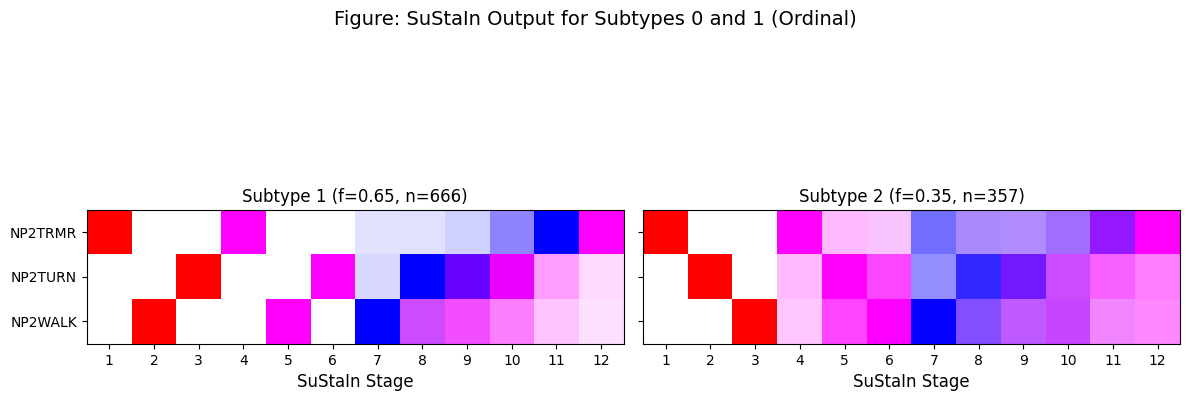

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import OrdinalSustain

# Define number of scores per biomarker
num_scores = 4

# Extract biomarker labels from your DataFrame
biomarker_labels = df_pd[ordinal_vars].columns

# Create correct subtype order as a list (NOT tuple)
subtype_order = list(range(samples_sequence.shape[0]))  # e.g. [0, 1]

# Plot combined positional variance
figs, axs = OrdinalSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    score_vals=score_vals,
    subtype_order=subtype_order,
    biomarker_labels=biomarker_labels,
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(12, 5)
)

plt.suptitle("Figure: SuStaIn Output for Subtypes 0 and 1 (Ordinal)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
print("score_vals shape:   ", score_vals.shape)              # (n_biomarkers, max_num_scores)
print("prob_score shape:   ", prob_score.shape)              # (n_samples, n_biomarkers, max_num_scores)
print("Flattened lengths: ",
      score_vals.shape[0]*score_vals.shape[1],
      prob_score.shape[1]*prob_score.shape[2])               # must be identical

In [149]:
print("samples_sequence shape:", samples_sequence.shape)
print("samples_f shape:", samples_f.shape)
print("n_samples:", n_samples)
print("score_vals shape:", score_vals.shape)
print("Number of biomarkers:", len(biomarker_labels))

samples_sequence shape: (2, 43, 10000)
samples_f shape: (2, 10000)
n_samples: 1024
score_vals shape: (11, 4)
Number of biomarkers: 11


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pySuStaIn.OrdinalSustain import OrdinalSustain

# 1) Load dataset
df = pd.read_csv(
    r'C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2) Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# 3) Split cohorts early
df_healthy = df[(df["COHORT"] == "Healthy Control") & (df["EVENT_ID"] == "V08")].copy()
df = df[df["EVENT_ID"] == "V08"].copy()

# 4) Define ordinal variables

ordinal_vars = [
    "NP3BRADY",   # Bradykinesia
    "NP3RIGRL",   # Rigidity - right leg
    "NP3RIGLL",   # Rigidity - left leg
    "NP3RIGRU",   # Rigidity - right upper limb
    "NP3RIGLU",   # Rigidity - left upper limb   
    "NP3FACXP",   # Facial expression
    "NP3PSTBL",   # Postural balance
    "NP3FRZGT",   # Freezing of gait
    "NP3GAIT",    # Gait   # Cloning (repetitive motor movements)    # Hand movement
]



selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + ordinal_vars + ["EVENT_ID"]
df = df[selected_columns].copy()

# 5) Extract PD/Prodromal
df_pd = df[df["COHORT"].isin(["PD", "Prodromal"])].copy()
print(f"Healthy controls: {df_healthy.shape[0]} | PD/Prodromal: {df_pd.shape[0]}")

# 6) Drop biomarkers with >20% missing
null_fraction = df_pd[ordinal_vars].isna().mean()
cols_to_drop = list(null_fraction[null_fraction > 0.20].index)
ordinal_vars = [v for v in ordinal_vars if v not in cols_to_drop]
df_pd.drop(columns=cols_to_drop, inplace=True)
df_healthy.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# 7) Drop biomarkers with only one unique value
low_variance_vars = [v for v in ordinal_vars if df_pd[v].nunique() <= 1]
if low_variance_vars:
    print(f"Dropping low-variance biomarkers: {low_variance_vars}")
    ordinal_vars = [v for v in ordinal_vars if v not in low_variance_vars]
    df_pd.drop(columns=low_variance_vars, inplace=True)
    df_healthy.drop(columns=low_variance_vars, inplace=True, errors='ignore')

print(f"Remaining biomarkers after filtering: {len(ordinal_vars)}")

# 8) Drop rows with missing values
df_pd.dropna(subset=ordinal_vars, inplace=True)
df_healthy.dropna(subset=ordinal_vars, inplace=True)

# 9) Create data matrices
data_mat_healthy = df_healthy[ordinal_vars].astype(float).values
data_mat_pd = df_pd[ordinal_vars].astype(float).values
n_samples = data_mat_pd.shape[0]
n_biomarkers = data_mat_pd.shape[1]

# 10) Build score matrix with padding using the next number (not zero)
def get_score_vals_padded(data_mat_healthy, data_mat_pd):
    combined_data = np.vstack([data_mat_healthy, data_mat_pd])
    n_biomarkers = combined_data.shape[1]

    max_scores_per_biomarker = []
    unique_scores_per_biomarker = []

    for b in range(n_biomarkers):
        unique_scores = np.unique(combined_data[:, b])
        valid_scores = unique_scores[unique_scores > 0] if 0 in unique_scores else unique_scores
        unique_scores_per_biomarker.append(valid_scores)
        max_scores_per_biomarker.append(len(valid_scores))

    max_num_scores = max(max_scores_per_biomarker)
    score_vals = np.zeros((n_biomarkers, max_num_scores), dtype=int)

    for b in range(n_biomarkers):
        valid_scores = unique_scores_per_biomarker[b]
        k = len(valid_scores)
        score_vals[b, :k] = valid_scores
        if k < max_num_scores:
            last_val = valid_scores[-1]
            score_vals[b, k:] = np.arange(last_val + 1, last_val + 1 + (max_num_scores - k))

    return score_vals

score_vals = get_score_vals_padded(data_mat_healthy, data_mat_pd)
max_num_scores = score_vals.shape[1]

# 11) Compute prob_nl
prob_nl = np.zeros((n_samples, n_biomarkers))
for j in range(n_biomarkers):
    vals = data_mat_healthy[:, j]
    mu, sigma = np.mean(vals), np.std(vals)
    sigma = sigma if sigma > 0 else 0.1
    prob_nl[:, j] = norm.pdf(data_mat_pd[:, j], loc=mu, scale=sigma)

# 12) Build p_score_dist matrix (using max_num_scores instead of N_scores)
p_score_dist = np.zeros((max_num_scores, max_num_scores + 1))  # true score z in 1..max_num_scores, observed s in 0..max
for z in range(1, max_num_scores + 1):
    for s in range(max_num_scores + 1):
        p_score_dist[z - 1, s] = norm.pdf(s, loc=z, scale=1.0)
    p_score_dist[z - 1] /= p_score_dist[z - 1].sum()

# 13) Compute prob_score
def compute_prob_score(data_mat_pd, p_score_dist):
    n_samples, n_biomarkers = data_mat_pd.shape
    max_num_scores = p_score_dist.shape[0]
    prob_score = np.zeros((n_samples, n_biomarkers, max_num_scores))
    for z in range(max_num_scores):
        for s in range(max_num_scores + 1):
            match_indices = (data_mat_pd == s)
            prob_score[match_indices, z] = p_score_dist[z, s]
    return prob_score

prob_score = compute_prob_score(data_mat_pd, p_score_dist)

# 14) Check for NaNs
print("NaNs in prob_nl:", np.isnan(prob_nl).sum())
print("NaNs in prob_score:", np.isnan(prob_score).sum())
if np.isnan(prob_nl).any() or np.isnan(prob_score).any():
    raise ValueError("There are NaNs in the probability matrices. Please check data preprocessing.")

# 15) Output directory
output_folder = "./ordinal_output"
os.makedirs(output_folder, exist_ok=True)

# Debugging shape consistency
print("score_vals shape:   ", score_vals.shape)
print("prob_score shape:   ", prob_score.shape)
print("Flattened lengths:  ",
      score_vals.shape[0] * score_vals.shape[1],
      prob_score.shape[1] * prob_score.shape[2])

# 16) Run SuStaIn
model = OrdinalSustain(
    prob_nl=prob_nl,
    prob_score=prob_score,
    score_vals=score_vals,
    biomarker_labels=ordinal_vars,
    N_startpoints=25,
    N_S_max=2,
    N_iterations_MCMC=int(1e4),
    output_folder=output_folder,
    dataset_name="PD_ordinal_V3",
    use_parallel_startpoints=False,
    seed=42
)
model.run_sustain_algorithm()


Healthy controls: 181 | PD/Prodromal: 1086
Remaining biomarkers after filtering: 9
NaNs in prob_nl: 0
NaNs in prob_score: 0
score_vals shape:    (9, 5)
prob_score shape:    (1003, 9, 5)
Flattened lengths:   45 45
Failed to find pickle file: ./ordinal_output\pickle_files\PD_ordinal_V3_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem


C:\Users\nss_1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pySuStaIn\OrdinalSustain.py:294: RuntimeWarning: invalid value encountered in divide
  p_perm_k_norm                       = p_perm_k_weighted / np.tile(np.sum(np.sum(p_perm_k_weighted, 1), 1).reshape(M, 1, 1), (1, N + 1, N_S))  # the second summation axis is different to Matlab version
